This is a notebook trying out blob detection for segmenting the proteins.

In [ ]:
%matplotlib inline


# Blob Detection

Blobs are bright on dark or dark on bright regions in an image. In
this example, blobs are detected using 3 algorithms. The image used
in this case is the Hubble eXtreme Deep Field. Each bright dot in the
image is a star or a galaxy.

## Laplacian of Gaussian (LoG)
This is the most accurate and slowest approach. It computes the Laplacian
of Gaussian images with successively increasing standard deviation and
stacks them up in a cube. Blobs are local maximas in this cube. Detecting
larger blobs is especially slower because of larger kernel sizes during
convolution. Only bright blobs on dark backgrounds are detected. See
:py:meth:`skimage.feature.blob_log` for usage.

## Difference of Gaussian (DoG)
This is a faster approximation of LoG approach. In this case the image is
blurred with increasing standard deviations and the difference between
two successively blurred images are stacked up in a cube. This method
suffers from the same disadvantage as LoG approach for detecting larger
blobs. Blobs are again assumed to be bright on dark. See
:py:meth:`skimage.feature.blob_dog` for usage.

## Determinant of Hessian (DoH)
This is the fastest approach. It detects blobs by finding maximas in the
matrix of the Determinant of Hessian of the image. The detection speed is
independent of the size of blobs as internally the implementation uses
box filters instead of convolutions. Bright on dark as well as dark on
bright blobs are detected. The downside is that small blobs (<3px) are not
detected accurately. See :py:meth:`skimage.feature.blob_doh` for usage.


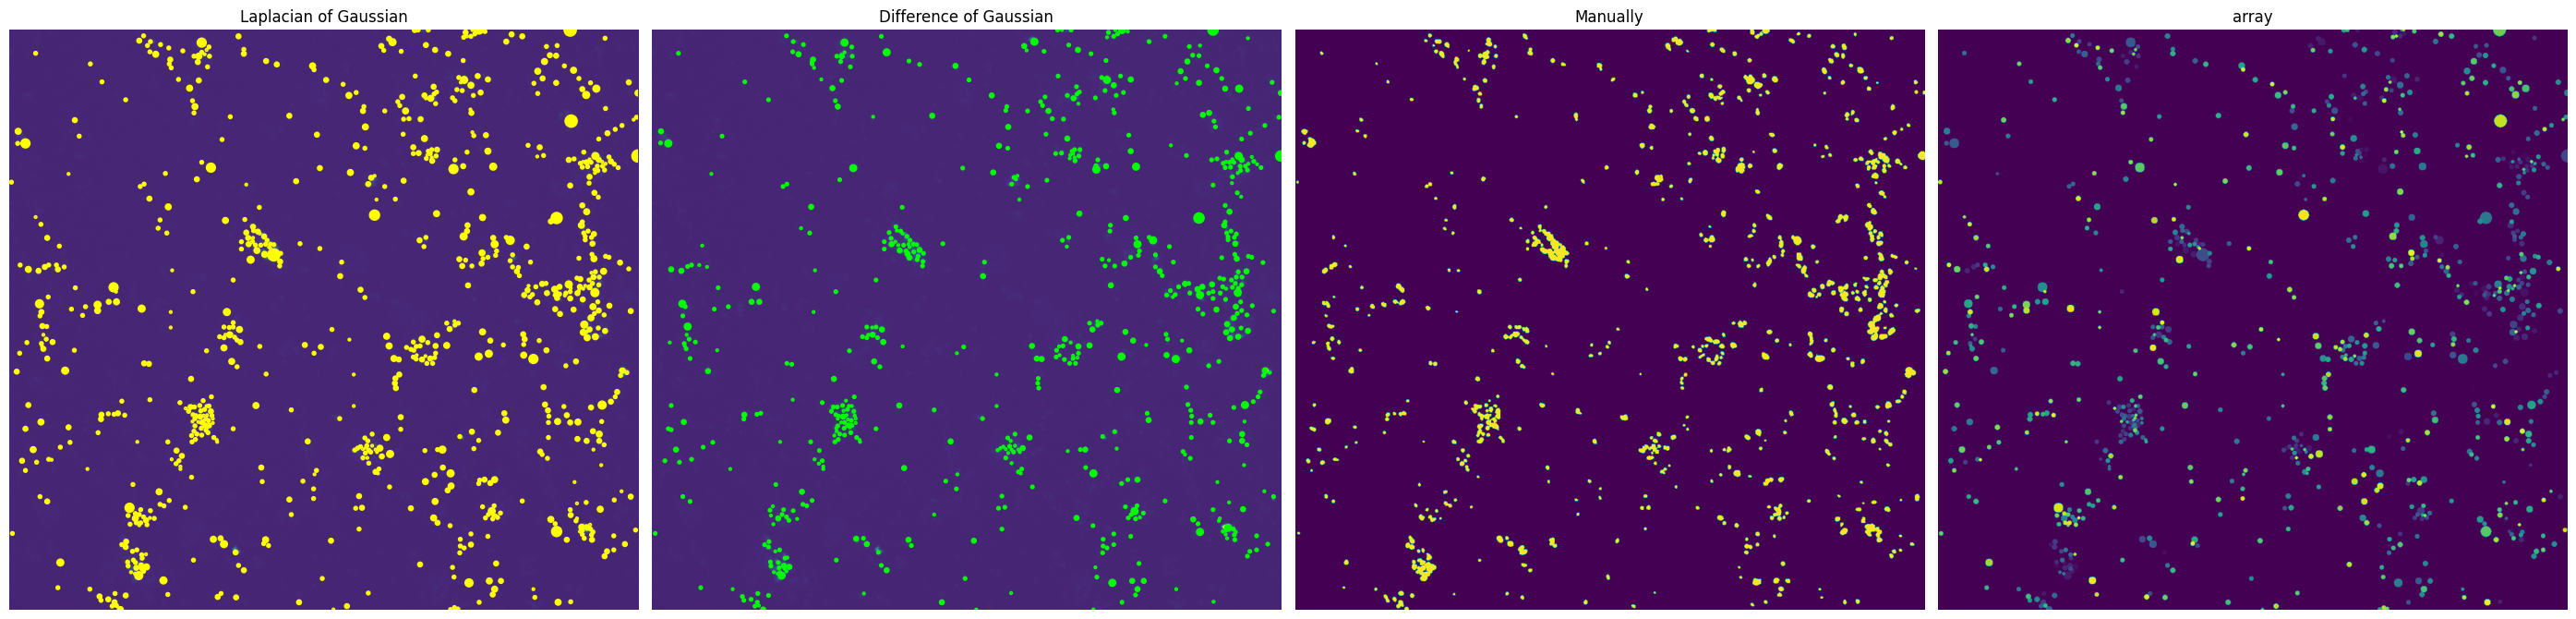

In [130]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray
from skimage import io
import matplotlib.pyplot as plt
labels_png = io.imread(r"data/AO_cBO 10_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_20.13.37_1BGTHP2/red_channel/page1_cp_masks.png")

image_gray = io.imread(r"data/AO_cBO 10_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_20.13.37_1BGTHP2/page1_R.tif")#data.hubble_deep_field()[0:500, 0:500]
#image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, max_sigma=8, threshold=.0002, overlap=0)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_dog = blob_dog(image_gray, max_sigma=9, threshold=.0002, overlap=0)
blobs_dog[:, 2] = blobs_dog[:, 2] * sqrt(2)

blobs_list = [blobs_log, blobs_dog]
colors = ['yellow', 'lime']
titles = ['Laplacian of Gaussian', 'Difference of Gaussian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 4, figsize=(28, 7), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image_gray, vmin=0, vmax=1000)
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=True)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()
import numpy as np
from skimage import draw
arr = np.zeros(labels_png.shape)
label = 1
for blob in blobs_log:
    y, x, r = blob
    ro, co = draw.disk((y, x), radius=r + 2, shape=arr.shape)
    #rr, cc = draw.circle_perimeter(int(x), int(y), radius=int(r), shape=arr.shape)
    arr[ro, co] = label
   # arr[rr, cc] = label
    label += 1
png_masked = (labels_png > 0).astype(int)
ax[2].imshow(png_masked)
ax[2].set_title("Manually")
ax[2].set_axis_off()
ax[3].imshow(arr)
ax[3].set_title("array")
ax[3].set_axis_off()
plt.tight_layout()
plt.show()
#extent = ax[3].get_window_extent().transformed(fig.dpi_scale_trans.inverted())
#fig.savefig(r"data/AO_cBO 10_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_20.13.37_1BGTHP2/red_channel/page1_masks_array.png", bbox_inches=extent)
plt.imsave(r"data/AO_cBO 10_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_20.13.37_1BGTHP2/red_channel/page1_masks_array.png", arr)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

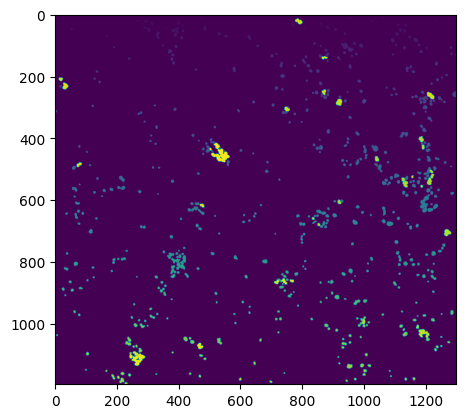

In [36]:
import numpy as np
labels_png = io.imread(r"data/AO_cBO 10_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_20.13.37_1BGTHP2/red_channel/page1_cp_masks.png")
plt.imshow(labels_png)
print(np.unique(labels_png))

In [38]:
label_blob = ax[0].asarray()

AttributeError: 'AxesSubplot' object has no attribute 'asarray'

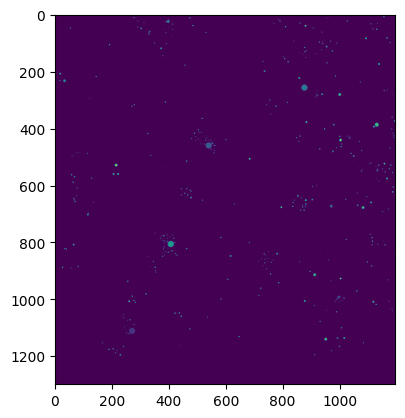

In [101]:
from skimage import draw
mage_gray = io.imread(r"data/AO_cBO 10_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_20.13.37_1BGTHP2/page1_R.tif")


blobs_dog = blob_dog(image_gray, max_sigma=15, min_sigma=1, threshold=.0003)

arr = np.zeros(labels_png.shape)
label = 1
for blob in blobs_dog:
    y, x, r = blob
    ro, co = draw.disk((x, y), radius=r, shape=arr.shape)
    rr, cc = draw.circle_perimeter(int(x), int(y), radius=int(r), shape=arr.shape)
    arr[ro, co] = label
    arr[rr, cc] = label
    label += 1
plt.imshow(arr.T)
#plt.show()
plt.imsave(r"data/AO_cBO 10_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_20.13.37_1BGTHP2/red_channel/page1_blob_label.png", arr.T)

(1197, 1299)


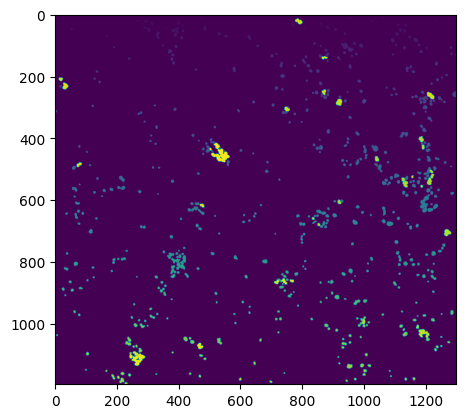

In [94]:
import numpy as np
labels_png = io.imread(r"data/AO_cBO 10_24h_63x_2022-02-15_AO_CF40_CalB520-APOE590-Tau647_63x_20.13.37_1BGTHP2/red_channel/page1_cp_masks.png")
plt.imshow(labels_png)
print(labels_png.shape)

In [100]:
png_masked = (labels_png > 0).astype(int)
dog_masked = (arr.T > 0).astype(int)
from sklearn.metrics import mean_squared_error
e = mean_squared_error(png_masked, dog_masked)
print(e)

ValueError: Found input variables with inconsistent numbers of samples: [1197, 1299]

In [131]:
dog_masked = (arr > 0).astype(int)
e = mean_squared_error(png_masked, dog_masked)
print(e)

0.021643150730302787
